In [1]:
import scanpy as sc
import singleCellHaystack as hs
import numpy as np

In [2]:
adata=sc.datasets.pbmc3k_processed()

100%|███████████████████████████████████████████████████████████████████████████| 23.5M/23.5M [00:00<00:00, 62.1MB/s]


In [3]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
adata_raw=adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

In [5]:
res=hs.haystack(adata_raw, basis="pca")

> starting haystack ...
> scaling coordinates ...
> converting to dense array ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████████████████████████| 13713/13713 [00:05<00:00, 2381.68it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.52it/s]


> calculating P values ...
> done.


In [6]:
exprs=adata_raw.X

In [7]:
exprs

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [8]:
coord=adata_raw.obsm["X_pca"]
coord

array([[ 5.556233  ,  0.2577139 , -0.18681023, ...,  0.02760133,
         2.6710324 , -0.29762036],
       [ 7.20953   ,  7.4819846 ,  0.16270587, ...,  2.930932  ,
         0.3541974 , -1.081801  ],
       [ 2.6944375 , -1.5836583 , -0.6631259 , ...,  1.0847819 ,
         0.3814702 ,  0.06466176],
       ...,
       [ 0.7853974 ,  6.7185917 ,  1.5988477 , ..., -1.1818857 ,
         0.9509114 , -0.29782164],
       [-0.2812718 ,  5.921856  ,  1.1628779 , ..., -0.93838155,
         0.3433971 , -1.0069869 ],
       [ 0.09076738,  0.66350496,  0.13484418, ...,  1.6905508 ,
         0.26859125, -0.9084492 ]], dtype=float32)

In [9]:
res2=hs.haystack_sparse(exprs, coord)

> entering sparse method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 genes ...


100%|████████████████████████████████████████████████████████████████████████| 13713/13713 [00:03<00:00, 4425.44it/s]


> calculating feature means ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.68it/s]


> calculating P values ...
> done.


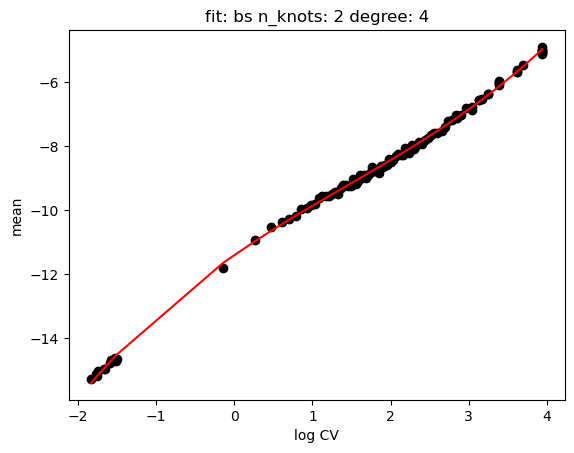

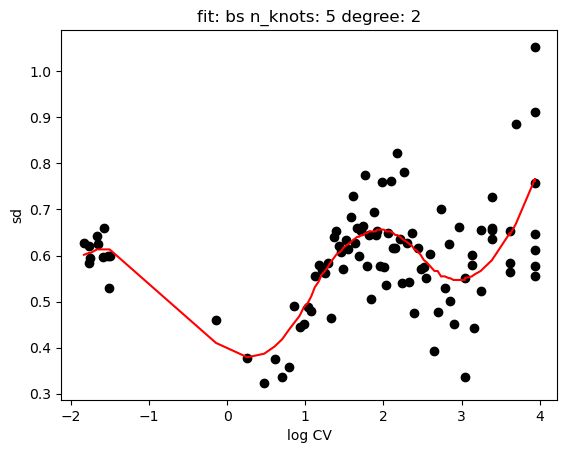

In [10]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

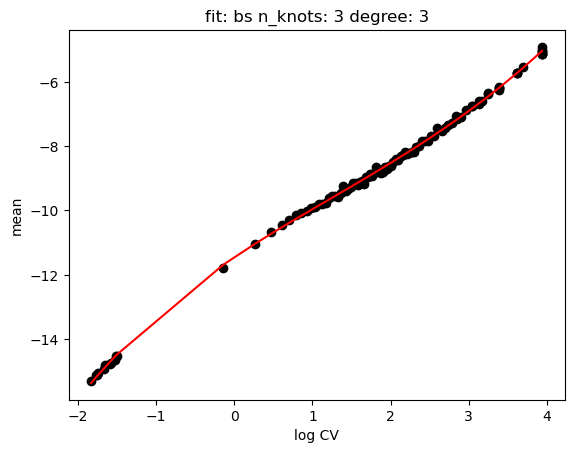

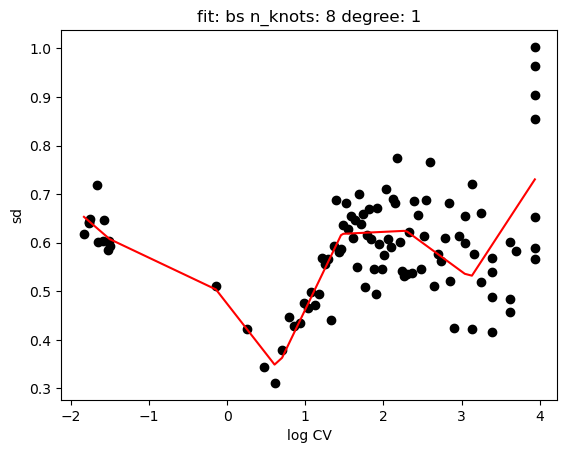

In [11]:
hs.plot_rand_fit(res2, "mean")
hs.plot_rand_fit(res2, "sd")

In [12]:
res["results"]

,gene,KLD,pval,pval_adj,logpval,logpval_adj
4380,LY6G6F,2.902877,5.383164e-21,2.924973e-43,-46.671011,-42.533878
11732,RP11-879F14.2,3.601881,2.897187e-19,2.829802e-39,-42.685376,-38.548244
327,SPOCD1,9.862606,3.956079e-19,5.797878e-39,-42.373863,-38.236731
13230,CLDN5,2.327754,4.138645e-19,6.432564e-39,-42.328748,-38.191616
6791,LCN2,4.643842,5.615331e-16,1.050199e-31,-35.115861,-30.978728
...,...,...,...,...,...,...
4743,NCOA7,0.000173,8.097886e-01,1.000000e+01,-0.210982,1.000000
4744,HINT3,0.000139,8.025192e-01,1.000000e+01,-0.220000,1.000000
4745,TRMT11,0.000160,7.699668e-01,1.000000e+01,-0.261408,1.000000
4734,ASF1A,0.000129,5.155526e-01,1.000000e+01,-0.662516,1.000000


In [13]:
res2["results"]

,KLD,pval,pval_adj,logpval,logpval_adj
4380,2.949392,2.308388e-21,4.162891e-44,-47.517737,-43.380605
11732,3.740611,5.059463e-21,2.535747e-43,-46.733027,-42.595894
13230,2.361771,3.351258e-20,1.971362e-41,-44.842366,-40.705234
327,9.897406,5.643666e-19,1.313862e-38,-42.018583,-37.881450
6791,4.688984,6.375583e-16,1.406846e-31,-34.988886,-30.851753
...,...,...,...,...,...
4776,0.000380,7.780094e-01,1.000000e+01,-0.251017,1.000000
4777,0.000118,6.949547e-01,1.000000e+01,-0.363909,1.000000
4778,0.000211,2.424401e-01,1.000000e+01,-1.417000,1.000000
4768,0.000488,2.483946e-01,1.000000e+01,-1.392737,1.000000


In [14]:
sum1 = res["results"]
sum1

,gene,KLD,pval,pval_adj,logpval,logpval_adj
4380,LY6G6F,2.902877,5.383164e-21,2.924973e-43,-46.671011,-42.533878
11732,RP11-879F14.2,3.601881,2.897187e-19,2.829802e-39,-42.685376,-38.548244
327,SPOCD1,9.862606,3.956079e-19,5.797878e-39,-42.373863,-38.236731
13230,CLDN5,2.327754,4.138645e-19,6.432564e-39,-42.328748,-38.191616
6791,LCN2,4.643842,5.615331e-16,1.050199e-31,-35.115861,-30.978728
...,...,...,...,...,...,...
4743,NCOA7,0.000173,8.097886e-01,1.000000e+01,-0.210982,1.000000
4744,HINT3,0.000139,8.025192e-01,1.000000e+01,-0.220000,1.000000
4745,TRMT11,0.000160,7.699668e-01,1.000000e+01,-0.261408,1.000000
4734,ASF1A,0.000129,5.155526e-01,1.000000e+01,-0.662516,1.000000


In [28]:
sum1 = sum1.sort_values("logpval")
sum1

,gene,KLD,pval,pval_adj,logpval,logpval_adj
4380,LY6G6F,2.902877,5.383164e-21,2.924973e-43,-46.671011,-42.533878
11732,RP11-879F14.2,3.601881,2.897187e-19,2.829802e-39,-42.685376,-38.548244
327,SPOCD1,9.862606,3.956079e-19,5.797878e-39,-42.373863,-38.236731
13230,CLDN5,2.327754,4.138645e-19,6.432564e-39,-42.328748,-38.191616
6791,LCN2,4.643842,5.615331e-16,1.050199e-31,-35.115861,-30.978728
...,...,...,...,...,...,...
820,RBM8A,0.000023,1.018085e+00,1.000000e+01,0.017924,1.000000
12148,CNN2,0.000020,1.019701e+00,1.000000e+01,0.019509,1.000000
7632,EIF3M,0.000021,1.021370e+00,1.000000e+01,0.021145,1.000000
9222,HNRNPC,0.000018,1.021655e+00,1.000000e+01,0.021424,1.000000


In [16]:
sum2 = res2["results"]
sum2

,KLD,pval,pval_adj,logpval,logpval_adj
4380,2.949392,2.308388e-21,4.162891e-44,-47.517737,-43.380605
11732,3.740611,5.059463e-21,2.535747e-43,-46.733027,-42.595894
13230,2.361771,3.351258e-20,1.971362e-41,-44.842366,-40.705234
327,9.897406,5.643666e-19,1.313862e-38,-42.018583,-37.881450
6791,4.688984,6.375583e-16,1.406846e-31,-34.988886,-30.851753
...,...,...,...,...,...
4776,0.000380,7.780094e-01,1.000000e+01,-0.251017,1.000000
4777,0.000118,6.949547e-01,1.000000e+01,-0.363909,1.000000
4778,0.000211,2.424401e-01,1.000000e+01,-1.417000,1.000000
4768,0.000488,2.483946e-01,1.000000e+01,-1.392737,1.000000


In [27]:
sum2 = sum2.sort_values("logpval")
sum2

,KLD,pval,pval_adj,logpval,logpval_adj
4380,2.949392,2.308388e-21,4.162891e-44,-47.517737,-43.380605
11732,3.740611,5.059463e-21,2.535747e-43,-46.733027,-42.595894
13230,2.361771,3.351258e-20,1.971362e-41,-44.842366,-40.705234
327,9.897406,5.643666e-19,1.313862e-38,-42.018583,-37.881450
6791,4.688984,6.375583e-16,1.406846e-31,-34.988886,-30.851753
...,...,...,...,...,...
2285,0.000025,1.049600e+00,1.000000e+01,0.048409,1.000000
3939,0.000028,1.052612e+00,1.000000e+01,0.051274,1.000000
329,0.000029,1.052836e+00,1.000000e+01,0.051488,1.000000
4248,0.000028,1.059525e+00,1.000000e+01,0.057820,1.000000


In [17]:
import pandas as pd

In [29]:
r1 = pd.DataFrame({
  "gene1": sum1.index, 
  "rank1": list(range(sum1.index.shape[0])),
})
r1

,gene1,rank1
0,4380,0
1,11732,1
2,327,2
3,13230,3
4,6791,4
...,...,...
13708,820,13708
13709,12148,13709
13710,7632,13710
13711,9222,13711


In [30]:
r2 = pd.DataFrame({
  "gene2": sum2.index, 
  "rank2": list(range(sum2.index.shape[0])),
})
r2

,gene2,rank2
0,4380,0
1,11732,1
2,13230,2
3,327,3
4,6791,4
...,...,...
13708,2285,13708
13709,3939,13709
13710,329,13710
13711,4248,13711


In [31]:
r1 = r1.sort_values("gene1")
r1 = r1.reset_index(drop=True)
r1

,gene1,rank1
0,0,10962
1,1,12135
2,2,2733
3,3,11049
4,4,9014
...,...,...
13708,13708,4249
13709,13709,13485
13710,13710,11059
13711,13711,7232


In [32]:
r2 = r2.sort_values("gene2")
r2 = r2.reset_index(drop=True)
r2

,gene2,rank2
0,0,5852
1,1,12124
2,2,3454
3,3,11322
4,4,8375
...,...,...
13708,13708,3640
13709,13709,13444
13710,13710,11895
13711,13711,10553


In [33]:
d = r1.join(r2)
d

,gene1,rank1,gene2,rank2
0,0,10962,0,5852
1,1,12135,1,12124
2,2,2733,2,3454
3,3,11049,3,11322
4,4,9014,4,8375
...,...,...,...,...
13708,13708,4249,13708,3640
13709,13709,13485,13709,13444
13710,13710,11059,13710,11895
13711,13711,7232,13711,10553


In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rank sparse')

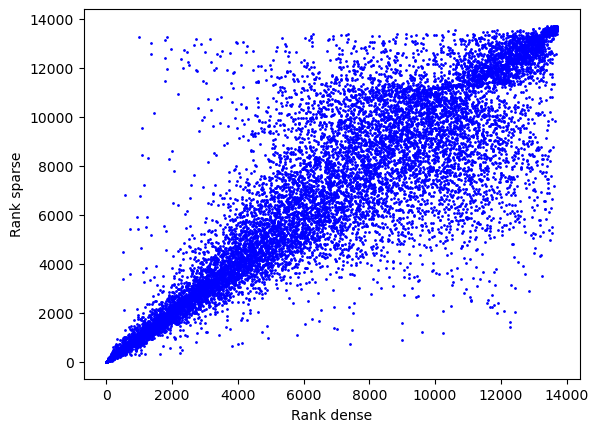

In [35]:
plt.plot(d.rank1, d.rank2, "bo", markersize=1)
plt.xlabel("Rank dense")
plt.ylabel("Rank sparse")